# Bias and Fairness
## Setup

In [1]:
import pandas as pd
import numpy as np
import pipeline
from pipeline import BiasCop

df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_by_year(df, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]

labeled_splits = [pipeline.label(split, lower_bound=14, drop_column=False)
                  for split in cleaned_splits]

train_df, test_df = labeled_splits[-1]

/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value enco

## Classifier Model

In [2]:
clf_pred_df = pipeline.run_one_clf(
    train_df,
    test_df,
    'DT',
    {},
    col_blacklist=['GEOID', 'year_evictions', 'evictions']
)

clf_cop = BiasCop(clf_pred_df)
clf_cop.xtabs()

model_id, score_thresholds 1 {'rank_abs': [195]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,195,majority_demo,af_am_alone,0.610619,0.892340,0.092632,0.429752,0.107660,...,0.203020,52,44,431,69,113,483,596,1336,0.189597
1,1,binary 0/1,195,majority_demo,hisp,0.454545,0.956044,0.064516,0.444444,0.043956,...,0.088235,4,6,87,5,11,91,102,1336,0.107843
2,1,binary 0/1,195,majority_demo,other,0.650000,0.955017,0.036649,0.400000,0.044983,...,0.101881,26,21,552,39,60,578,638,1336,0.094044


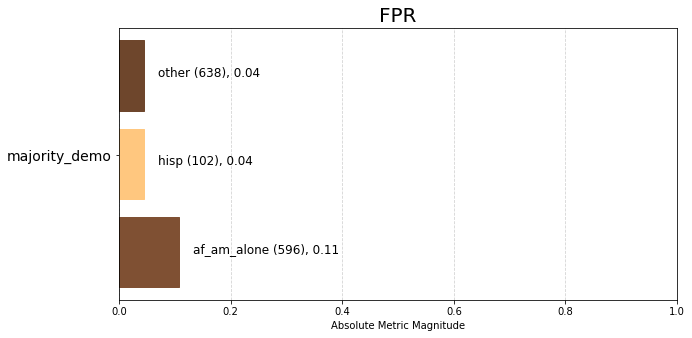

In [3]:
clf_cop.plot_group_metric('fpr')

get_disparity_predefined_group()


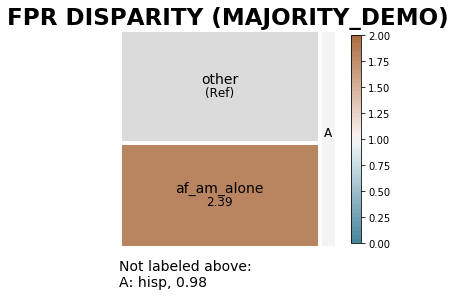

In [4]:
clf_cop.plot_disparity('fpr_disparity')

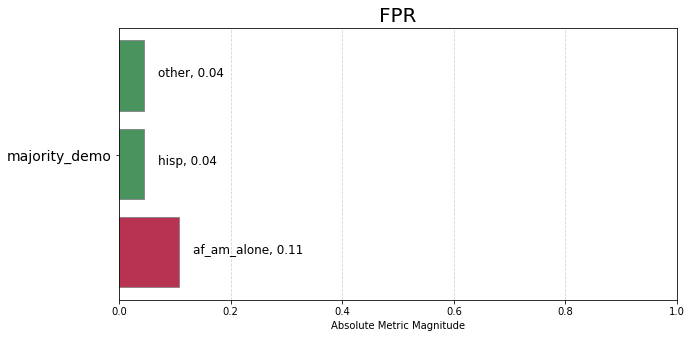

In [5]:
clf_cop.plot_fairness('fpr')

## Regression Model

In [6]:
reg_pred_df = pipeline.run_one_reg(
    train_df,
    test_df,
    'SVR',
    {},
    label_col='evictions',
    col_blacklist=['GEOID', 'year_evictions', 'label']
)

# Have to turn our predicted scores into a binary label
reg_pred_df = pipeline.label_df(
    reg_pred_df,
    14,
    label_col='pred_label',
    evictions_col='score'
)

reg_cop = BiasCop(reg_pred_df, score_col='pred_label')
reg_cop.xtabs()

/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model_id, score_thresholds 1 {'rank_abs': [361]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,361,majority_demo,af_am_alone,0.814159,0.790890,0.052109,0.523316,0.209110,...,0.323826,101,21,382,92,113,483,596,1336,0.189597
1,1,binary 0/1,361,majority_demo,hisp,0.818182,0.879121,0.024390,0.550000,0.120879,...,0.196078,11,2,80,9,11,91,102,1336,0.107843
2,1,binary 0/1,361,majority_demo,other,0.900000,0.837370,0.012245,0.635135,0.162630,...,0.231975,94,6,484,54,60,578,638,1336,0.094044


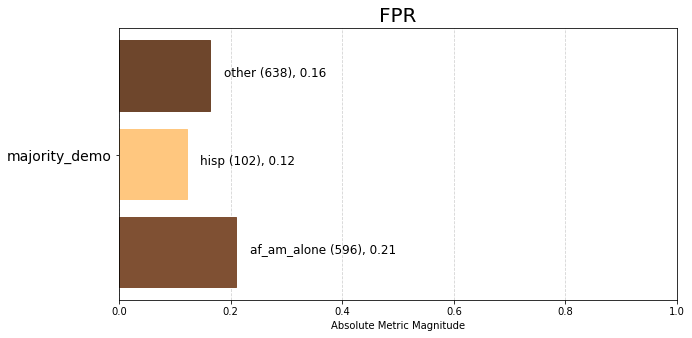

In [7]:
reg_cop.plot_group_metric('fpr')

get_disparity_predefined_group()


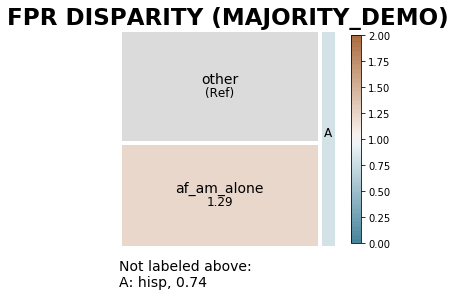

In [8]:
reg_cop.plot_disparity('fpr_disparity')

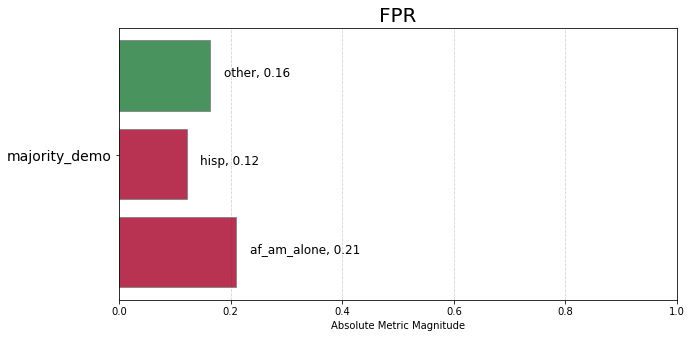

In [9]:
reg_cop.plot_fairness('fpr')